In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Correlation study and analysis for water quality index calculated for 87 municipalities in Santander's Department at year 2015 in terms of several physico-chemical parameters.
Based on data of SIVICAP: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Caracter-sticas-Calidad-del-Agua-SIVICAP/jjzc-8w82. (Colombia)

In [2]:
data=pd.read_csv('Caracteristicas_Calidad_del_Agua_SIVICAP_Santander.csv',
                 header=0,skipfooter=0,engine='python')
data_var=data.iloc[:,2:16]
data_orig=data.iloc[:,2:17]
#data=data[data.columns['MUESTRAS','COLOR_APARENTE','TURBIEDAD','PH','ALCALINIDAD_TOTAL','CALCIO','MAGNESIO','DUREZA','SULFATOS','HIERRO','CLORUROS','NITRITOS','COLIFORMES_TOTALES','E_COLI','IRCA_PROMEDIO']]
#data=data.replace(r'', np.nan, regex=False)
#data=np.ma.array(data, mask=np.isnan(data)) # Use a mask to mark the NaNs 
#data=data.fillna(data.mean())
#data=pd.DataFrame(data)
#data=data[(data['RESULTADO COLIFORMES TOTALES']!=0) & (data['RESULTADO E.COLI']!=0) & (data['RESULTADO COLOR APARENTE']!=0) & (data['RESULTADO TURBIEDAD']!=0) & (data['RESULTADO NITRATOS']!=0)]# & (data['RESULTADO NITRITOS']!=0)]
#data=data.reset_index(drop=True)
#data=data.drop(data.index[[0,18,22,23,26,33,35,38,39,42,44,54,55,58,9,15,20,21,27,41]])
data_to_export=data_var.head(8)
data_orig

,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA
0,0.905556,0.336667,7.408889,1.214286,46.000000,18.611111,12.601111,72.433333,17.911667,0.100000,8.202222,0.010571,905.000000,300.000000,9.874444
1,0.714286,0.235714,7.500000,1.000000,78.214286,25.742857,31.151429,154.685714,69.870000,0.050000,5.165714,0.026200,1292.857143,1410.000000,32.004285
2,1.888889,0.427778,7.265556,0.385714,23.722222,6.100000,5.176667,27.666667,6.386667,0.097143,4.178750,0.020571,963.375000,75.250000,31.928888
3,0.372222,0.961111,7.702222,1.556667,52.700000,35.611111,21.145556,123.716667,62.070000,0.121429,10.981111,0.013200,1396.333333,85.111111,30.994444
4,0.319000,0.690000,7.327273,1.200000,7.300000,3.550000,3.742222,21.790000,30.957143,0.115714,7.495000,0.014625,4.700000,0.000000,4.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.833333,1.453333,7.300000,1.333333,31.583333,17.283333,11.523333,65.233333,4.550000,0.096000,7.976667,0.026400,3.333333,0.000000,14.366666
83,2.028571,1.774286,7.250000,1.171250,54.214286,24.157143,17.045714,95.214286,49.468000,0.120000,10.385714,0.009600,13.000000,0.000000,26.711250
84,1.500000,0.235000,7.850000,0.675000,8.250000,3.990000,2.507500,14.475000,53.880000,0.030000,3.427500,0.007000,640.250000,98.250000,43.152500
85,0.571429,0.155714,7.414286,1.542857,7.142857,4.585714,2.352857,14.378571,14.130000,0.266000,10.351429,0.017167,0.428571,0.000000,2.677142


#### Water Quality Index:

The Water Quality Index is calculated from a standard international version as:

The WQI is given as:
\begin{equation}
    WQI=\frac{\sum_{j=1}^nq_jw_j}{\sum_{j=1}^nw_j},
    \label{eq:WQI_study}
\end{equation}
where $q_j$ = quality rating (sub index) of j-th water quality parameter, $w_j$ = unit weight of j-th water quality parameter ($\sum_{j=1}^nw_j=1$). Also, $q_j$, which relates the value of the parameter in polluted water to the standard permissible value is obtained as follows:
\begin{equation}
    q_j=\frac{v_j-v_{lim}}{s_j-v_{lim}}\times 100,
    \label{eq:qi_study}
\end{equation}
where $v_j$ = estimated value of the j-th parameter, $v_{lim}$ = ideal value of the j-th parameter, $s_j$ = standard permissible value of the j-th parameter.

In most cases, $v_{lim}$=0 except for pH and DO. In fact, for pH, $v_{lim}$=7; and for DO, $v_{lim}$=14.6 mg/l. The unit weight ($w_j$), which is inversely proportional to the values of the recommended standards is obtained as:
\begin{equation}
    w_j=\frac{k}{s_j},
    \label{eq:wj_study}
\end{equation}
where $k=\left(\sum_{j=1}^n\frac{1}{s_j}\right)^{-1}$. The rating of the water quality using the above method is shown in next table.

#### Rating of Water Quality for various WQI

| WQI value | Rating of Water Quality |
| ---- | ---- |
| 0-25 | Excellent |
| 26-50 | Good |
| 51-75 | Poor |
| 76-100 | Very poor |
| Above 100 | Unsuitable for Drinking |

In [3]:
# Defining the referencial values for study characteristics or parameters
ref=np.array([15,2,9,2,200,60,36,300,250,0.3,250,0.1,10,10])
sum_ref=np.sum(ref)
inv=1./ref
sum_inv=np.sum(inv)
# Calculating K (proporcionality constant) and weight for the parameters
k=1./sum_inv
wi=np.array(1.*k/ref)
# Defining level of quality
califi=np.array(['Excellent','Good','Poor','Very Poor','Unsuitable'])
IRCA_CAL=1.*data.Apparent_Color/ref[0]*100.*wi[0]+1.*data.Turbinity/ref[1]*100.*wi[1]+1.*(data.pH-7.)/(ref[2]-7.)*100.*wi[2]\
+1.*data.Res_Cloride/ref[3]*100.*wi[3]+1.*data.Alkalinity/ref[4]*100.*wi[4]+1.*data.Calcium/ref[5]*100.*wi[5]\
+1.*data.Magnesium/ref[6]*100.*wi[6]+1.*data.Hardness/ref[7]*100.*wi[7]+1.*data.Sulfates/ref[8]*100.*wi[8]\
+1.*data.Iron/ref[9]*100.*wi[9]+1.*data.Clorures/ref[10]*100.*wi[10]+1.*data.Nitrites/ref[11]*100.*wi[11]\
+1.*data.Coliforms/ref[12]*100.*wi[12]+1.*data.E_Coli/ref[13]*100.*wi[13]
IRCA_CAL=pd.Series(IRCA_CAL,name='IRCA_CAL')
NIVEL_CAL=[]
for i in IRCA_CAL:
    if i>=0 and i<=25:
        NIVEL='Excellent'
    if i>25 and i<=50:
        NIVEL='Good'
    if i>50 and i<=75:
        NIVEL='Poor'
    if i>75 and i<=100:
        NIVEL='Very Poor'
    if i>100:
        NIVEL='Unsuitable'
#    print NIVEL
    NIVEL_CAL.append(NIVEL)

NIVEL_CAL=pd.Series(NIVEL_CAL,name='NIVEL_CAL')
data_new=pd.concat([data_var, IRCA_CAL], axis=1)
#data_new.head()
#NIVEL_CAL

In [4]:
from scipy import stats # For in-built method to get PCC
names=list(data.columns.values)
names

['Municipalities',
 'Samples',
 'Apparent_Color',
 'Turbinity',
 'pH',
 'Res_Cloride',
 'Alkalinity',
 'Calcium',
 'Magnesium',
 'Hardness',
 'Sulfates',
 'Iron',
 'Clorures',
 'Nitrites',
 'Coliforms',
 'E_Coli',
 'IRCA',
 'Level']

##### Coeficientes de correlación entre variables:

In [5]:
corr=data_new.corr()
corr=corr.style.apply(
    lambda x: ['font-weight: bold; background-color: none'
               if abs(value) >= 0.5 else '' for value in x])
corr

,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA_CAL
Apparent_Color,1,0.927807,0.0220239,-0.0174504,0.237914,0.0980559,0.19576,0.153098,-0.00284383,0.221953,0.0248603,0.494482,0.139151,0.0998219,0.277688
Turbinity,0.927807,1,0.0262877,0.0350695,0.323909,0.179192,0.282909,0.237042,0.0134846,0.152178,-0.0250507,0.451938,0.132937,0.0830355,0.267015
pH,0.0220239,0.0262877,1,-0.0931943,0.00149152,-0.0341586,-0.0322779,-0.029878,0.0921988,0.668233,-0.0608366,-0.028184,0.0328322,-0.0193515,0.110069
Res_Cloride,-0.0174504,0.0350695,-0.0931943,1,-0.0788115,0.0570196,-0.0278859,-0.0157146,0.0963982,-0.0612916,0.00129853,0.0347383,0.109854,0.283191,0.184681
Alkalinity,0.237914,0.323909,0.00149152,-0.0788115,1,0.785668,0.91888,0.927475,0.258423,-0.0971268,0.00855378,0.184106,0.0479301,0.107707,0.0945297
Calcium,0.0980559,0.179192,-0.0341586,0.0570196,0.785668,1,0.817437,0.84124,0.407747,-0.120527,0.0889383,0.131468,0.0379092,0.11072,0.071353
Magnesium,0.19576,0.282909,-0.0322779,-0.0278859,0.91888,0.817437,1,0.978166,0.428157,-0.112433,0.0298961,0.201666,0.0393732,0.221896,0.111167
Hardness,0.153098,0.237042,-0.029878,-0.0157146,0.927475,0.84124,0.978166,1,0.466901,-0.137536,0.0264533,0.165155,0.0291291,0.178184,0.0837867
Sulfates,-0.00284383,0.0134846,0.0921988,0.0963982,0.258423,0.407747,0.428157,0.466901,1,-0.167336,-0.0763976,0.0337976,0.0392029,0.175998,0.064993
Iron,0.221953,0.152178,0.668233,-0.0612916,-0.0971268,-0.120527,-0.112433,-0.137536,-0.167336,1,-0.0189829,0.0270029,0.0448539,-0.0373062,0.159047


In [6]:
data_new

,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA_CAL
0,0.905556,0.336667,7.408889,1.214286,46.000000,18.611111,12.601111,72.433333,17.911667,0.100000,8.202222,0.010571,905.000000,300.000000,99.174847
1,0.714286,0.235714,7.500000,1.000000,78.214286,25.742857,31.151429,154.685714,69.870000,0.050000,5.165714,0.026200,1292.857143,1410.000000,207.015299
2,1.888889,0.427778,7.265556,0.385714,23.722222,6.100000,5.176667,27.666667,6.386667,0.097143,4.178750,0.020571,963.375000,75.250000,93.123076
3,0.372222,0.961111,7.702222,1.556667,52.700000,35.611111,21.145556,123.716667,62.070000,0.121429,10.981111,0.013200,1396.333333,85.111111,123.097533
4,0.319000,0.690000,7.327273,1.200000,7.300000,3.550000,3.742222,21.790000,30.957143,0.115714,7.495000,0.014625,4.700000,0.000000,22.287112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.833333,1.453333,7.300000,1.333333,31.583333,17.283333,11.523333,65.233333,4.550000,0.096000,7.976667,0.026400,3.333333,0.000000,30.306813
83,2.028571,1.774286,7.250000,1.171250,54.214286,24.157143,17.045714,95.214286,49.468000,0.120000,10.385714,0.009600,13.000000,0.000000,21.702410
84,1.500000,0.235000,7.850000,0.675000,8.250000,3.990000,2.507500,14.475000,53.880000,0.030000,3.427500,0.007000,640.250000,98.250000,58.923063
85,0.571429,0.155714,7.414286,1.542857,7.142857,4.585714,2.352857,14.378571,14.130000,0.266000,10.351429,0.017167,0.428571,0.000000,34.731683


In [7]:
describe=data_new.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
Apparent_Color,87.0,2.802148,5.682433,0.000000,0.502500,1.285455,3.000000,49.000000
Turbinity,87.0,1.714198,3.534672,0.004667,0.352143,0.710000,1.667778,28.958000
pH,87.0,7.636447,3.740454,5.805000,7.119136,7.287500,7.440000,41.975000
Res_Cloride,87.0,1.126313,1.225462,0.000000,0.725379,1.000000,1.277439,11.000000
Alkalinity,87.0,46.146060,34.144554,3.636364,16.362500,36.066667,67.884824,136.375000
Calcium,87.0,15.705260,10.209586,0.000000,7.014205,15.144444,23.998214,40.925000
Magnesium,87.0,11.798232,8.109420,0.935000,5.282964,9.447297,16.349821,31.151429
Hardness,87.0,66.699602,45.749551,4.300000,29.094286,51.420714,94.815476,231.243750
Sulfates,87.0,27.590601,15.601198,0.140000,17.224175,25.018750,37.519032,69.870000
Iron,87.0,0.103991,0.090213,0.010000,0.054167,0.085000,0.117857,0.666364


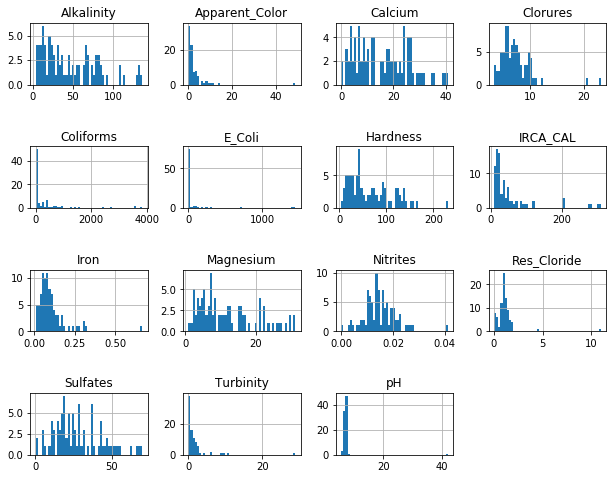

In [8]:
data_new.hist(xlabelsize=10,ylabelsize=10,bins=50,sharey=False,grid=True,figsize=(8,6))
plt.subplots_adjust(left=0.0, right=1, bottom=0.0, top=1, hspace=1, wspace=0.3)
plt.show()

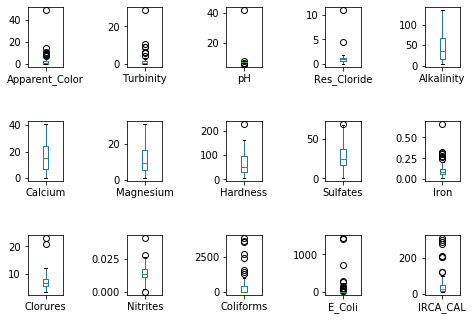

In [9]:
data_new.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.subplots_adjust(left=0.0, right=1, bottom=0.0, top=1, hspace=0.9, wspace=1.8)
plt.show()

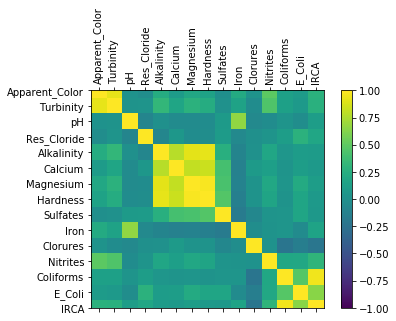

In [10]:
correlations = data_new.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[2:17],rotation='vertical')
ax.set_yticklabels(names[2:17])
plt.show()

# Desarrollando regresión lineal múltiple (lineal, estandar) para el conjunto de datos...

In [11]:
#data['IRCA_CAL']

In [12]:
#from pandas.core import datetools
import statsmodels.api as sm
X=data[['Apparent_Color','Turbinity','pH','Res_Cloride','Alkalinity','Calcium','Magnesium','Hardness','Sulfates','Iron',
 'Clorures','Nitrites','Coliforms','E_Coli']]
y=data.IRCA#['IRCA_CAL']#.as_matrix().astype(np.float)
X_add=sm.add_constant(X)
est=sm.OLS(y,X, missing='drop').fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   IRCA   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              20.50
Date:                Sat, 02 Nov 2019   Prob (F-statistic):                    7.65e-20
Time:                        10:09:16   Log-Likelihood:                         -312.96
No. Observations:                  87   AIC:                                      653.9
Df Residuals:                      73   BIC:                                      688.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Apparent_Color    -1.7161      0.567     -3.024      0.003      -2.847      -0.585
Turbinity          3.5664      0.890      4.007      0.000       1.793       5.340
pH                 0.6746      0.414      1.631      0.107      -0.150       1.499
Res_Cloride        1.4406      0.924      1.559      0.123      -0.401       3.283
Alkalinity         0.0622      0.106      0.589      0.558      -0.148       0.273
Calcium           -0.0893      0.195     -0.459      0.648      -0.477       0.299
Magnesium          0.2536      0.688      0.369      0.713      -1.118       1.625
Hardness          -0.1123      0.142     -0.792      0.431      -0.395       0.170
Sulfates           0.2004      0.094      2.135      0.036       0.013       0.387
Iron              11.0933     18.134      0.612      0.543     -25.047      47.234
Clorures          -0.2959      0.313     -0.945      0.348      -0.920       0.328
Nitrites         120.0714    175.694      0.683      0.497    -230.086     470.229
Coliforms          0.0072      0.002      4.667      0.000       0.004       0.010
E_Coli             0.0029      0.006      0.496      0.621      -0.009       0.015
==============================================================================
Omnibus:                        5.393   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.062
Skew:                           0.589   Prob(JB):                       0.0796
Kurtosis:                       3.081   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
est.params

Apparent_Color     -1.716101
Turbinity           3.566374
pH                  0.674633
Res_Cloride         1.440587
Alkalinity          0.062176
Calcium            -0.089291
Magnesium           0.253588
Hardness           -0.112292
Sulfates            0.200425
Iron               11.093274
Clorures           -0.295891
Nitrites          120.071411
Coliforms           0.007244
E_Coli              0.002938
dtype: float64

In [14]:
y_pred=data_new.Apparent_Color*est.params[0]+data_new.Turbinity*est.params[1]+data_new.pH*est.params[2]\
+data_new.Res_Cloride*est.params[3]+data_new.Alkalinity*est.params[4]+data_new.Calcium*est.params[5]\
+data_new.Magnesium*est.params[6]+data_new.Hardness*est.params[7]+data_new.Sulfates*est.params[8]\
+data_new.Iron*est.params[9]+data_new.Clorures*est.params[10]+data_new.Nitrites*est.params[11]\
+data_new.Coliforms*est.params[12]+data_new.E_Coli*est.params[13]
y_pred-data.IRCA

0      3.758750
1     -3.111410
2    -18.260136
3     -6.711696
4      9.904940
        ...    
82    -6.655991
83   -13.022173
84   -23.568433
85     7.923057
86     9.499287
Length: 87, dtype: float64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


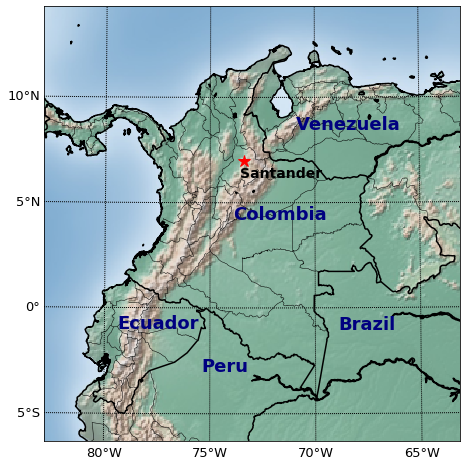

In [15]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10,8))

m = Basemap(projection='lcc',lat_0=4,lon_0=-73,width=2.2E6,height=2.3E6,resolution='h')
# draw parallels and meridians.
parallels = np.arange(-90.,91.,5.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=13)
# Draw Meridians and Labels
meridians = np.arange(-80.,65.,5.)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=13)
#m.drawmapboundary(fill_color='aquamarine',linewidth=2)
m.drawcountries(linewidth=1.5)
#m.fillcontinents(color = 'wheat')
m.drawcoastlines(linewidth=1.5)
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
m.etopo(scale=4., alpha=0.5)
lon = -73.4
lat = 7.0
x,y = m(lon, lat)
xs,ys = m(lon-0.2, lat-0.8)
xc,yc = m(lon-0.5, lat-2.8)
xv,yv = m(lon+2.5, lat+1.5)
xe,ye = m(lon-6., lat-8)
xp,yp = m(lon-2., lat-10)
xb,yb = m(lon+4.5, lat-8)
m.plot(x, y, color='red',marker='*', markersize=12)
plt.text(xs,ys,'Santander',fontsize=14,color='k',fontweight='bold')
plt.text(xc,yc,'Colombia',fontsize=18,color='navy',fontweight='bold')
plt.text(xv,yv,'Venezuela',fontsize=18,color='navy',fontweight='bold')
plt.text(xe,ye,'Ecuador',fontsize=18,color='navy',fontweight='bold')
plt.text(xp,yp,'Peru',fontsize=18,color='navy',fontweight='bold')
plt.text(xb,yb,'Brazil',fontsize=18,color='navy',fontweight='bold')

m.shadedrelief(scale=0.5)
# Define a colormap
jet = plt.cm.get_cmap('jet')
plt.savefig('col1.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

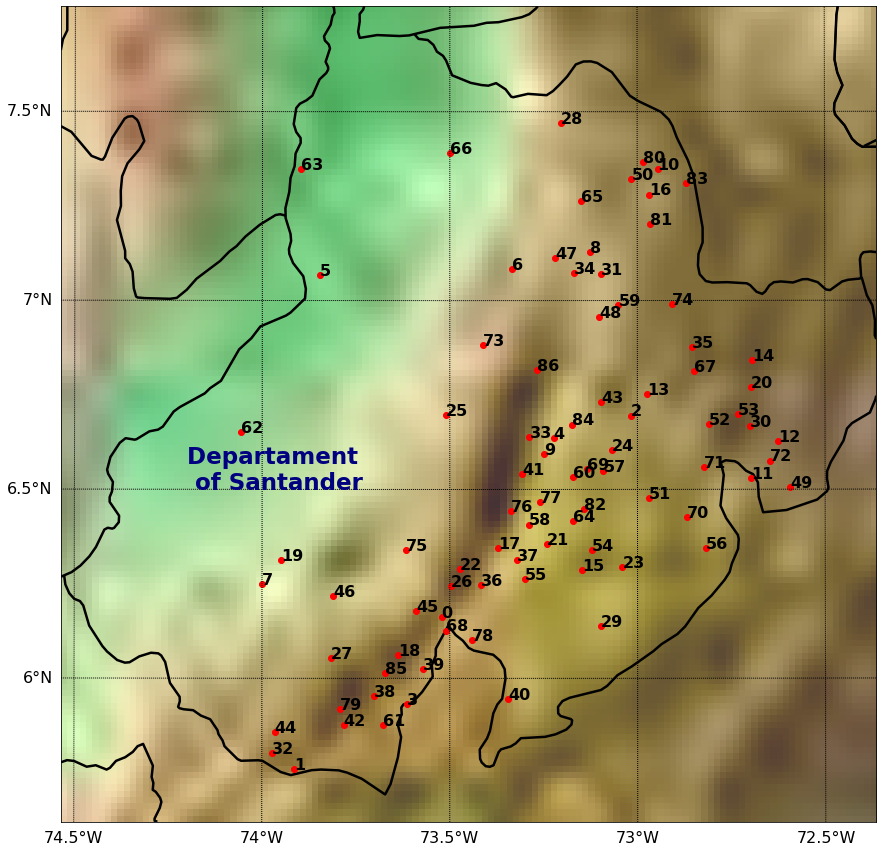

In [16]:
plt.figure(figsize=(25,15))

m = Basemap(projection='lcc',lat_0=6.7,lon_0=-73.45,width=0.24E6,height=0.24E6,resolution='h')
m.drawcoastlines()
m.drawcountries()
_ = m.drawstates()
# draw parallels and meridians.
parallels = np.arange(6,8.2,0.5)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=16)
# Draw Meridians and Labels
meridians = np.arange(-74.5,-72.3,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=16)
#m.drawmapboundary(fill_color='white',linewidth=2)
m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)
m.drawstates(linewidth=2.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
#m.shadedrelief(scale=2)
m.etopo(scale=4, alpha=0.8)
#m.arcgisimage(service = "World_Shaded_Relief",xpixels = 4000,ypixels = 4000)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)
# Define a colormap
jet = plt.cm.get_cmap('jet')

mun=pd.read_csv('municipios.csv',delimiter=',',header=0)
mun_san=mun[mun.Dep=='Santander']

LAT,LONG=[],[]
for i in mun_san.lat:
    LAT.append(float(i))
for i in mun_san.lon:
    LONG.append(float(i))

xc,yc = m(-74.2, 6.5)
plt.text(xc,yc,'Departament \n of Santander',fontsize=23,color='navy',fontweight='bold')

x,y = m(LONG,LAT)
#m.plot(x, y, 'ro', markersize=data_new.IRCAL_CAL[0:3])

labels = range(87)#data.MUNICIPO
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+3.5, ypt+3.5, label,fontsize=16,color='black',fontweight='bold')
    
m.scatter(x,y,c='red', marker='o', zorder=2,cmap="viridis",alpha=1)
plt.savefig('col2.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

In [17]:
data.Municipalities.head()

0       Aguada
1      Albania
2      Aratoca
3      Barbosa
4    Barichara
Name: Municipalities, dtype: object

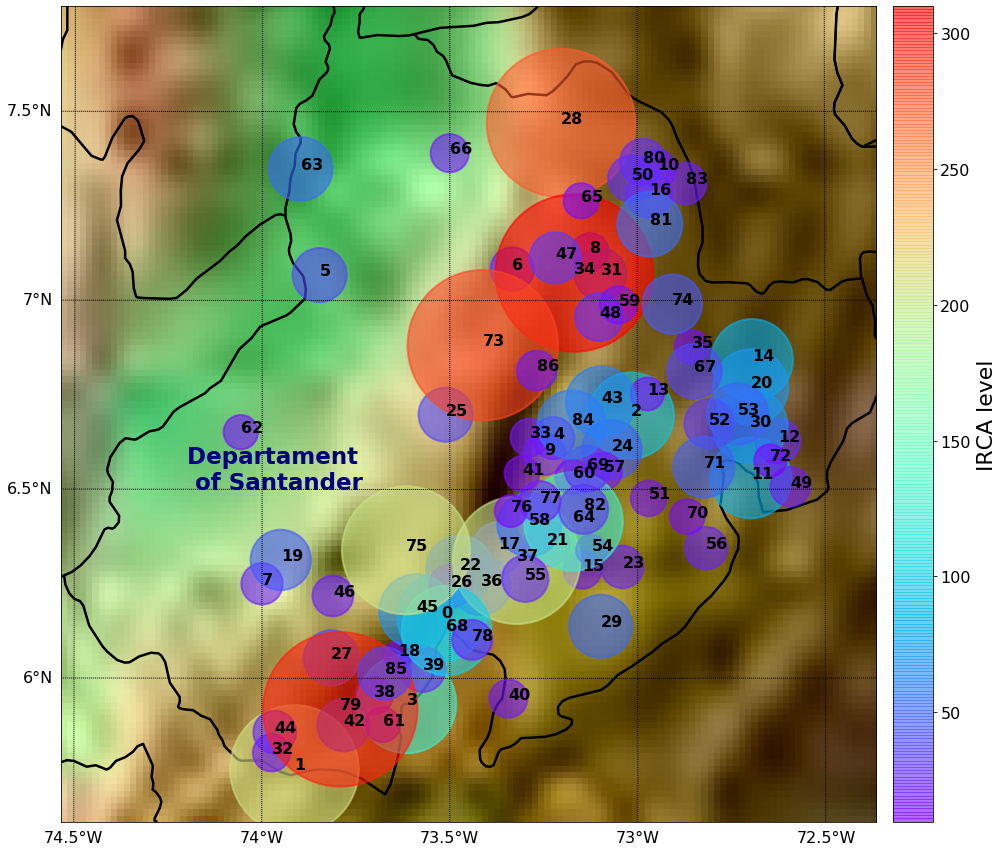

In [18]:
import pylab
plt.figure(figsize=(25,15))

m = Basemap(projection='lcc',lat_0=6.7,lon_0=-73.45,width=0.24E6,height=0.24E6,resolution='h')
m.drawcoastlines()
m.drawcountries()
_ = m.drawstates()
# draw parallels and meridians.
parallels = np.arange(6,8.2,0.5)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=16)
# Draw Meridians and Labels
meridians = np.arange(-74.5,-72.3,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=16)
#m.drawmapboundary(fill_color='white',linewidth=2)
m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)
m.drawstates(linewidth=2.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
#m.shadedrelief(scale=2)
m.etopo(scale=4, alpha=1.)
#m.arcgisimage(service = "World_Shaded_Relief",xpixels = 4000,ypixels = 4000)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)
# Define a colormap
jet = plt.cm.get_cmap('jet')

mun=pd.read_csv('municipios.csv',delimiter=',',header=0)
mun_san=mun[mun.Dep=='Santander']

mun=pd.read_csv('municipios.csv',delimiter=',',header=0)
mun_san=mun[mun.Dep=='Santander']

LAT,LONG=[],[]
for i in mun_san.lat:
    LAT.append(float(i))
for i in mun_san.lon:
    LONG.append(float(i))

xc,yc = m(-74.2, 6.5)
plt.text(xc,yc,'Departament \n of Santander',fontsize=23,color='navy',fontweight='bold')

x,y = m(LONG,LAT)
#m.plot(x, y, 'ro', markersize=data_new.IRCAL_CAL[0:3])

labels = range(87)#data.MUNICIPO
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+3.5, ypt+3.5, label,fontsize=16,color='black',fontweight='bold')

m.scatter(x,y,s=data_new.IRCA_CAL*80,c=data_new.IRCA_CAL,marker='o',zorder=2,cmap="rainbow",alpha=0.6,lw=2)
cbar= m.colorbar()
cbar.set_label("IRCA level", labelpad=+6,fontsize=22)
cbar.ax.tick_params(labelsize=20)

plt.savefig('col3.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
cbar.ax.tick_params(labelsize=16)

plt.show()

In [19]:
ybar_CAL=[np.count_nonzero(NIVEL_CAL==califi[0]),np.count_nonzero(NIVEL_CAL==califi[1]),np.count_nonzero(NIVEL_CAL==califi[2]),np.count_nonzero(NIVEL_CAL==califi[3]),np.count_nonzero(NIVEL_CAL==califi[4])]
ybar_CAL_percen=ybar_CAL/np.sum(ybar_CAL)*100.
ybar=[np.count_nonzero(data.Level=='SIN RIESGO'),np.count_nonzero(data.Level=='BAJO'),np.count_nonzero(data.Level=='MEDIO'),np.count_nonzero(data.Level=='ALTO'),np.count_nonzero(data.Level=='INVIABLE SANITARIAMENTE')]
ybar_percen=ybar/np.sum(ybar)*100.

In [20]:
ybar_percen, ybar_CAL_percen

(array([29.88505747, 27.5862069 , 34.48275862,  8.04597701,  0.        ]),
 array([42.52873563, 31.03448276, 10.34482759,  4.59770115, 11.49425287]))

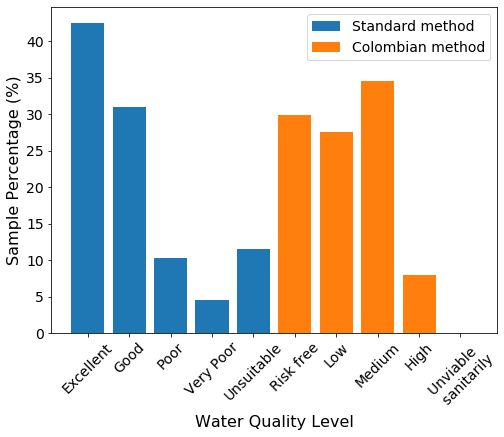

In [21]:
plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
califi_orig=['Risk free','Low','Medium','High','Unviable \n sanitarily']
plt.bar(califi,ybar_CAL_percen,label='Standard method')
plt.bar(califi_orig,ybar_percen,label='Colombian method')
plt.xlabel('Water Quality Level', fontsize=16)
plt.ylabel('Sample Percentage (%)', fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('compa1.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

In [22]:
poblacion=np.array([1855,5096,8312,28635,7215,191768,5110,12351,527985,2267,1984,5593,5039,1865,5708,10540,2670,3087,5088,\
           44733,5292,2705,3491,7558,11899,20099,2005,5140,11776,2497,3323,6301,265452,2311,5044,180305,6395,4756,\
           2139,3679,3849,2345,3137,1103,8587,15374,5152,38560,12185,2378,18382,5297,10880,5193,4775,11738,5054,\
           3330,2241,4112,149219,5201,12476,7548,31511,27114,18652,8540,3986,45445,2488,4346,2379,34640,2137,4304,\
           7789,30577,10277,8397,3295,7085,4670,19057,2435,5858,8929])

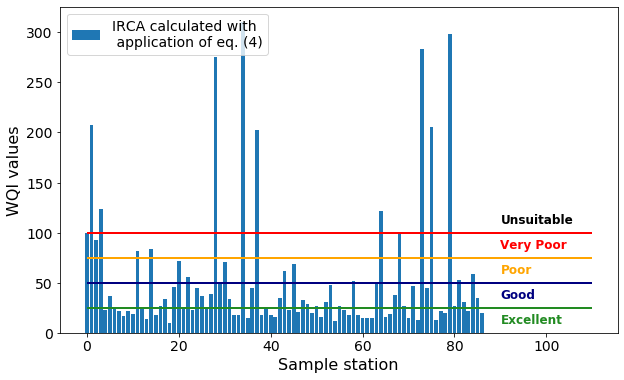

In [23]:
plt.figure(figsize=(10,6))
plt.bar(range(87),data_new.IRCA_CAL,width=0.8,label='IRCA calculated with \n application of eq. (4)')
plt.xlabel('Sample station', fontsize=16)
plt.ylabel('WQI values', fontsize=16)
plt.hlines(25,xmin=0, xmax=110, linewidth=2, color='forestgreen')
plt.text(90,12.5-3,'Excellent',color='forestgreen',fontsize=12,fontweight='bold')
plt.hlines(50,xmin=0, xmax=110, linewidth=2, color='navy')
plt.text(90,37.5-3,'Good',color='navy',fontsize=12,fontweight='bold')
plt.hlines(75,xmin=0, xmax=110, linewidth=2, color='orange')
plt.text(90,62.5-3,'Poor',color='orange',fontsize=12,fontweight='bold')
plt.hlines(100,xmin=0, xmax=110, linewidth=2, color='red')
plt.text(90,87.5-3,'Very Poor',color='red',fontsize=12,fontweight='bold')
plt.text(90,112.5-3,'Unsuitable',color='black',fontsize=12,fontweight='bold')
plt.legend(ncol=2,loc=2,fontsize=14)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('compa2.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

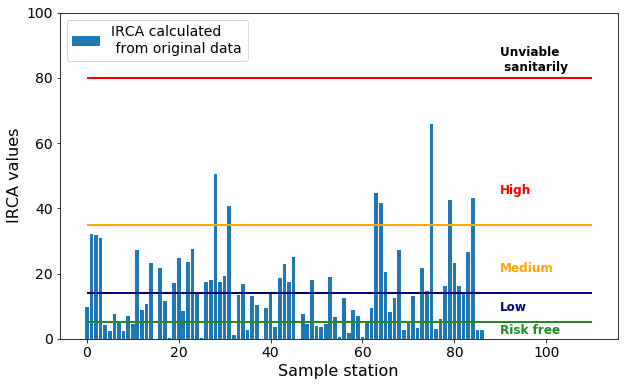

In [24]:
plt.figure(figsize=(10,6))
plt.bar(range(87),data_orig.IRCA,width=0.8,label='IRCA calculated \n from original data')
plt.xlabel('Sample station', fontsize=16)
plt.ylabel('IRCA values', fontsize=16)
plt.hlines(5,xmin=0, xmax=110, linewidth=2, color='forestgreen')
plt.text(90,2.5-1,'Risk free',color='forestgreen',fontsize=12,fontweight='bold')
plt.hlines(14,xmin=0, xmax=110, linewidth=2, color='navy')
plt.text(90,7.5+1,'Low',color='navy',fontsize=12,fontweight='bold')
plt.hlines(35,xmin=0, xmax=110, linewidth=2, color='orange')
plt.text(90,17.5+3,'Medium',color='orange',fontsize=12,fontweight='bold')
plt.hlines(80,xmin=0, xmax=110, linewidth=2, color='red')
plt.text(90,47.5-3,'High',color='red',fontsize=12,fontweight='bold')
plt.text(90,90-8,'Unviable \n sanitarily',color='black',fontsize=12,fontweight='bold')
plt.legend(ncol=2,loc=2,fontsize=14)
plt.ylim(0,100)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('compa3.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

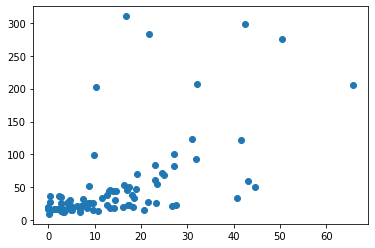

In [25]:
plt.scatter(data.IRCA,data_new.IRCA_CAL)
plt.show()

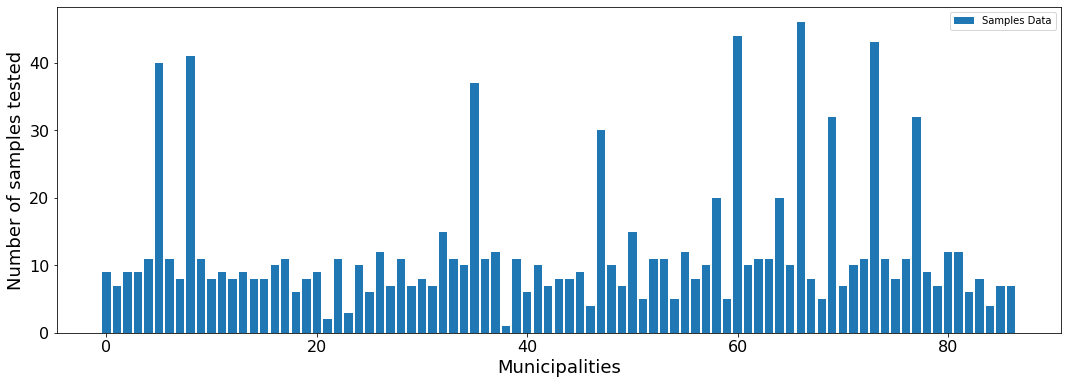

In [26]:
plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
plt.bar(range(87),data.Samples,label='Samples Data')
plt.xlabel('Municipalities', fontsize=18)
plt.ylabel('Number of samples tested', fontsize=18)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0,fontsize=16)
plt.legend(loc='best')
plt.savefig('stations.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

In [27]:
stat,pvalue=stats.ttest_1samp(data_new.T,0)   

In [28]:
stat,pvalue

(array([1.63064046, 1.82577869, 1.27661239, 1.40332614, 2.97006782,
        3.31982821, 3.24323848, 2.22665163, 2.75189353, 2.83950499,
        2.32998941, 1.20773666, 2.38709771, 2.32551601, 1.42141834,
        2.6128694 , 2.40537622, 2.58954681, 2.35486226, 1.84755436,
        2.11217935, 2.55032873, 1.30978478, 2.26321005, 1.39677156,
        2.37499559, 2.7443443 , 3.52976919, 1.18415336, 1.45181771,
        1.65026304, 2.6493118 , 2.7212687 , 3.2816865 , 1.61800756,
        2.75302351, 1.56763844, 1.13067057, 2.17648044, 2.56042368,
        2.6842373 , 3.35847137, 2.72320722, 1.75512826, 2.32759699,
        1.4795203 , 2.4723038 , 3.2440414 , 2.85225586, 2.97520228,
        2.4421465 , 2.61307985, 1.5163572 , 1.60402081, 3.1871891 ,
        3.02100732, 2.61905189, 3.07877142, 2.19877094, 3.16226463,
        2.7153668 , 2.71399157, 2.41980319, 1.25860011, 1.51449951,
        3.05155273, 3.56918587, 1.79708031, 3.34510993, 3.19106861,
        2.61497924, 2.28405272, 3.34991639, 1.16

In [29]:
data_new

,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA_CAL
0,0.905556,0.336667,7.408889,1.214286,46.000000,18.611111,12.601111,72.433333,17.911667,0.100000,8.202222,0.010571,905.000000,300.000000,99.174847
1,0.714286,0.235714,7.500000,1.000000,78.214286,25.742857,31.151429,154.685714,69.870000,0.050000,5.165714,0.026200,1292.857143,1410.000000,207.015299
2,1.888889,0.427778,7.265556,0.385714,23.722222,6.100000,5.176667,27.666667,6.386667,0.097143,4.178750,0.020571,963.375000,75.250000,93.123076
3,0.372222,0.961111,7.702222,1.556667,52.700000,35.611111,21.145556,123.716667,62.070000,0.121429,10.981111,0.013200,1396.333333,85.111111,123.097533
4,0.319000,0.690000,7.327273,1.200000,7.300000,3.550000,3.742222,21.790000,30.957143,0.115714,7.495000,0.014625,4.700000,0.000000,22.287112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.833333,1.453333,7.300000,1.333333,31.583333,17.283333,11.523333,65.233333,4.550000,0.096000,7.976667,0.026400,3.333333,0.000000,30.306813
83,2.028571,1.774286,7.250000,1.171250,54.214286,24.157143,17.045714,95.214286,49.468000,0.120000,10.385714,0.009600,13.000000,0.000000,21.702410
84,1.500000,0.235000,7.850000,0.675000,8.250000,3.990000,2.507500,14.475000,53.880000,0.030000,3.427500,0.007000,640.250000,98.250000,58.923063
85,0.571429,0.155714,7.414286,1.542857,7.142857,4.585714,2.352857,14.378571,14.130000,0.266000,10.351429,0.017167,0.428571,0.000000,34.731683


In [30]:
data_new.IRCA_CAL.max(), data_new.IRCA_CAL.min()

(310.0423870202883, 9.587685649389327)

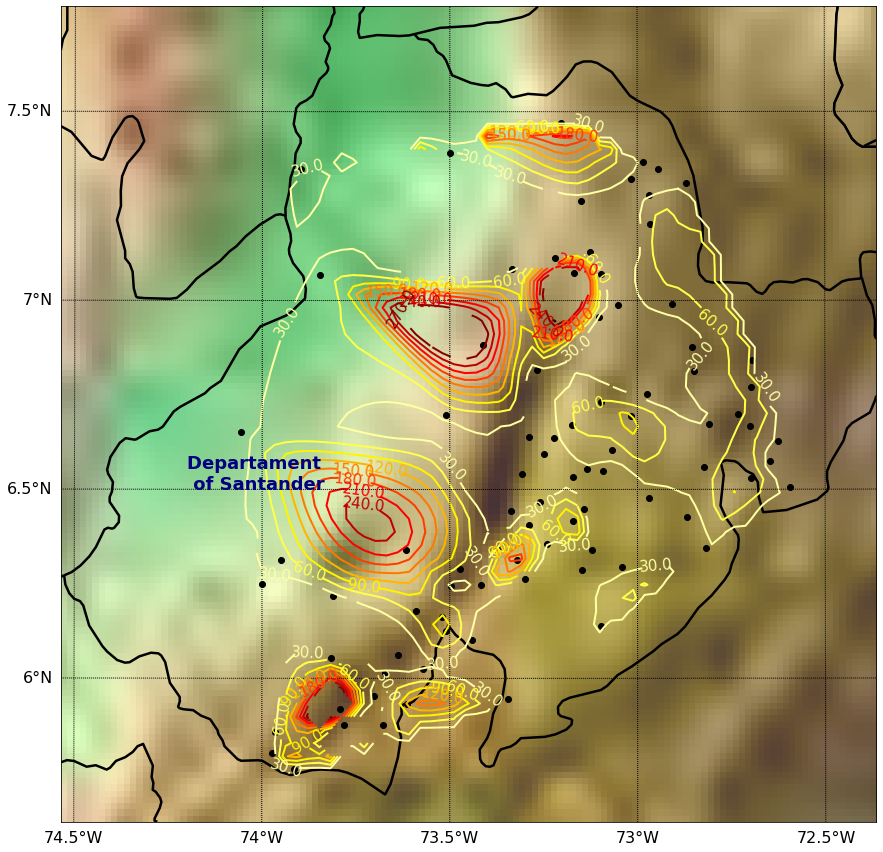

In [31]:
from scipy.interpolate import griddata
plt.figure(figsize=(25,15))

m = Basemap(projection='lcc',lat_0=6.7,lon_0=-73.45,width=0.24E6,height=0.24E6,resolution='h')
m.drawcoastlines()
m.drawcountries()
_ = m.drawstates()
# draw parallels and meridians.
parallels = np.arange(6,8.2,0.5)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=16)
# Draw Meridians and Labels
meridians = np.arange(-74.5,-72.3,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=16)
#m.drawmapboundary(fill_color='white',linewidth=2)
m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)
m.drawstates(linewidth=2.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
#m.shadedrelief(scale=3)
m.etopo(scale=4, alpha=0.8)
#m.arcgisimage(service = "World_Shaded_Relief",xpixels = 4000,ypixels = 4000)
#m.arcgisimage(service='World_Shaded_Relief', verbose= True)
# Define a colormap
jet = plt.cm.get_cmap('jet')

mun=pd.read_csv('municipios.csv',delimiter=',',header=0)
mun_san=mun[mun.Dep=='Santander']

mun=pd.read_csv('municipios.csv',delimiter=',',header=0)
mun_san=mun[mun.Dep=='Santander']

LAT,LONG=[],[]
for i in mun_san.lat:
    LAT.append(float(i))
for i in mun_san.lon:
    LONG.append(float(i))

xc,yc = m(-74.2, 6.5)
plt.text(xc,yc,'Departament \n of Santander',fontsize=18,color='navy',fontweight='bold')

x,y = m(LONG,LAT)
#m.plot(x, y, 'ro', markersize=data_new.IRCAL_CAL[0:3])

labels = range(87)#data.MUNICIPO
#for label, xpt, ypt in zip(labels, x, y):
#    plt.text(xpt+3.5, ypt+3.5, label,fontsize=19,color='black')#,fontweight='bold')
    
m.scatter(x,y,c='black', marker='o', zorder=2,cmap="viridis",alpha=1)

X_dat = x#LONG
Y_dat = y#LAT
Z_dat = data_new.IRCA_CAL

# Convert from pandas dataframes to numpy arrays 
X, Y, Z, = np.array([]), np.array([]), np.array([]) 

for i in range(len(X_dat)):
    X = np.append(X,X_dat[i]) 
    Y = np.append(Y,Y_dat[i]) 
    Z = np.append(Z,Z_dat[i]) 

# create x-y points to be used in heatmap 
xi = np.linspace(X.min(),X.max(),50) 
yi = np.linspace(Y.min(),Y.max(),50) 

# Z is a matrix of x-y values 
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic',rescale=True,fill_value=20.) 
zmin = np.min(Z_dat) 
zmax = np.max(Z_dat) 
zi[(zi<zmin) | (zi>zmax)] = None 
levels=[0,25,50,75,10]
# Create the contour plot 
CS=plt.contour(xi, yi, zi, cmap="hot_r",linewidths=2,levels=10)
plt.clabel(CS, inline=True,fontsize=15,fmt='%1.1f')
#cbar=m.colorbar() 
#cbar.set_label("IRCA level", labelpad=+6,fontsize=20)

#cbar.ax.tick_params(labelsize=16)
plt.savefig('col3_2.png', format='png', dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()